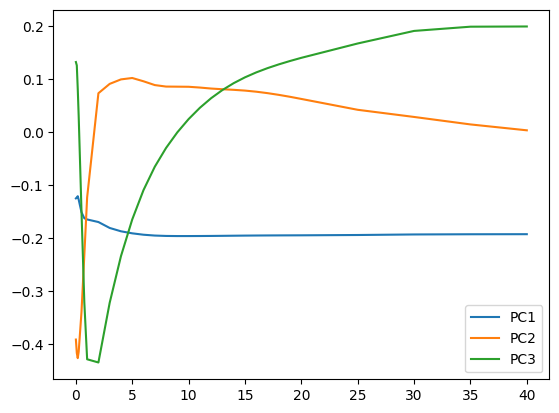

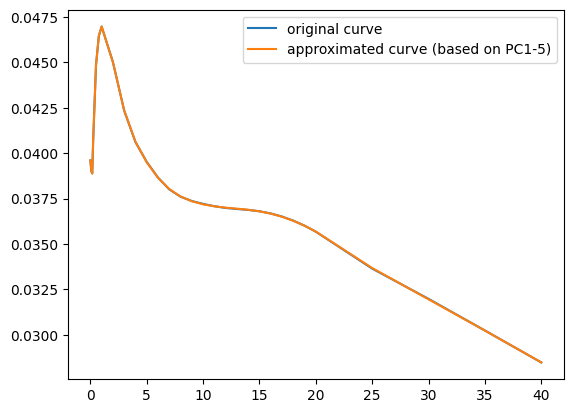

In [1]:
import numpy as np
import os
import math
import pandas as pd
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# read in raw data file
#data_fn = "D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/2023/MyCourseMaterials/course_slides_notes/lect7/sofr_hist_rates.csv"
#data_fn = "D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/2023/MyCourseMaterials/course_slides_notes/lect7/sofr_hist_chg.csv"
#data_fn = "D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/2024/assignment/sofr_hist_rates.csv"
#data_fn = "D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/2024/assignment/sofr_hist_rate_chg.csv"
#data_fn = "D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/2024/assignment/sofr_hist_rates_from1y.csv"
#data_fn = "D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/2024/assignment/sofr_hist_rate_chg_from1y.csv"
data_fn = 'sofr_hist_rates.csv'


df_data = pd.read_csv(data_fn)
arr_data = df_data.to_numpy()
tenor_labels = list(df_data.columns)
# curve rate tenors in year fractions
tenorInYears = [0.002778, 0.083333, 0.166667, 0.25, 0.50, 0.75, 1, 2, 3, 4, 
               5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
              20, 25, 30, 35, 40]
#tenorInYears = [1, 2, 3, 4, 
#                5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
 #               20, 25, 30, 35, 40]



# standardize each column data
arr_data_stdized = StandardScaler().fit_transform(df_data)
df_data_stdized = pd.DataFrame(arr_data_stdized, columns = tenor_labels)


##################################
####### PCA construction #########
##################################

# step (1): compute the correlation matrix
n = len(arr_data_stdized)
mat_corr = np.dot(arr_data_stdized.transpose(),arr_data_stdized)/n

# step (2): eigen-decompose the correlation matrix using numpy function which
#           automatically orders the eigen vectors by the size of the assocaited 
#           eigenvalues
egval, egvec = np.linalg.eig(mat_corr)

# visualize the PCs (recall the PCs are effectively the eigenvectors)
pc_labels = ["PC1" , "PC2" , "PC3" , "PC4" , "PC5" , "PC6" , "PC7" , 
             "PC8" , "PC9" , "PC10" , "PC11" , "PC12" , "PC13" , "PC14" , 
            "PC15" , "PC16" , "PC17" , "PC18" , "PC19" , "PC20" , "PC21" , 
           "PC22" , "PC23" , "PC24" , "PC25" , "PC26" , "PC27" , "PC28" , 
          "PC29", "PC30"]
#pc_labels = ["PC1" , "PC2" , "PC3" , "PC4" , "PC5" , "PC6" , "PC7" , 
 #            "PC8" , "PC9" , "PC10" , "PC11" , "PC12" , "PC13" , "PC14" , 
  #           "PC15" , "PC16" , "PC17" , "PC18" , "PC19" , "PC20" , "PC21" , 
   #          "PC22" , "PC23" , "PC24"]
df_pcs =  pd.DataFrame(egvec, columns = pc_labels)
plt.plot(tenorInYears, df_pcs["PC1"], label = "PC1")
plt.plot(tenorInYears, df_pcs["PC2"], label = "PC2")
plt.plot(tenorInYears, df_pcs["PC3"], label = "PC3")
plt.legend()
plt.show()

# calculate projected PC coordinates of the standardized data
pc_coordinates = np.dot(arr_data_stdized, egvec)

# data reconstruction

# cache the mean and standard deviation of the original data 
# for reverting the data standardization
mat_mean = np.tile(np.mean(arr_data, axis = 0), (n, 1))
stdev = np.std(arr_data, axis = 0)
mat_stdev = np.diag(stdev)

#1) full reconstruction
data_stdized_full_reconstruction = np.dot(pc_coordinates, egvec.transpose())                                        
data_full_reconstruction = np.add(mat_mean, np.dot(data_stdized_full_reconstruction, mat_stdev)) 
#check reconstruction success/failure:
#print("min difference: " + str(np.min(data_full_reconstruction - arr_data)))
#print("max difference: " + str(np.max(data_full_reconstruction - arr_data)))


#2) compression (utilizing the first 5 PCs)
data_stdized_comp = np.dot(pc_coordinates[:,0:15], egvec[:,0:15].transpose())
data_comp = np.add(mat_mean, np.dot(data_stdized_comp, mat_stdev))
# revert data standardization to obtained the raw curve rate data approximated
# by the first 5 PCs

# compare approximated curve on the i-th date using the first 5 PCs to the original curve
i = 1
plt.plot(tenorInYears, arr_data[i], label = "original curve")
plt.plot(tenorInYears, data_comp[i], label = "approximated curve (based on PC1-5)")
plt.legend()
plt.show()